## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.manifold import TSNE
import time
import sys
from BLCC import MixtureModelBernoulli

# Get data
df = pd.read_csv("../Data/NSI/narcissistic_personality_inventory.csv",index_col=0)
print(df.shape)

(11243, 40)


# Pre Cluster Analysis
## TSNE Plot

Text(0.5, 1.0, 'Preselected TSNE plot\nperp:40, randstate:294')

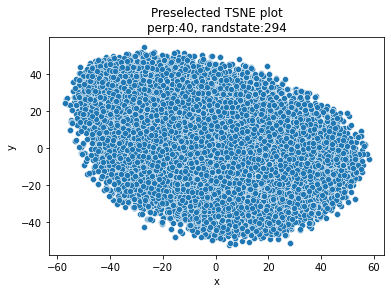

In [2]:
# Get projected data
df_proj = TSNE(perplexity=40,
               random_state=294,
               metric="hamming",
               square_distances=True).fit_transform(df)
df_proj = pd.DataFrame(df_proj,columns=["x","y"])
# Plot on ax
sns.scatterplot(x="x",
                y="y",
                data=df_proj)
plt.title(f"Preselected TSNE plot\nperp:{40}, randstate:{294}")

# Run model

In [ ]:
num_classes = 8
random_state = 100
max_iter = 300
burn_in = 100

print("Data Size")
print("---------")
print(f"Samples: {df.shape[0]}")
print(f"Features: {df.shape[1]}")

# Set up model
C_list = MixtureModelBernoulli(num_classes=num_classes,
                               random_state=random_state,
                               burn_in=burn_in,
                               max_iter=max_iter)


# fit the data to the model
print(f"\nRunning {max_iter} iterations...",end="")
start_time = time.time()
C_list.fit(df)
total_time = time.time() - start_time

print("DONE!")
print(f"Total time: {round(total_time,5)} (secs)")

# Get parameter estimates
theta, pi, k = C_list.get_params()

Data Size
---------
Samples: 11243
Features: 40

Running 300 iterations...

# Print Parameters

## Pi

In [5]:
pi = pd.DataFrame(pi)
pi.columns = ["Probability"]
pi.index = [f"Cluster {x}" for x in np.arange(0,len(pi)).astype(str)]
display(pi)

array([3, 0, 3, ..., 4, 7, 3])

## Theta

In [6]:
theta = pd.DataFrame(theta)
theta.columns = [f"Item {x}" for x in np.arange(1,theta.shape[1]+1).astype(str)]
theta.index = [f"Cluster {x}" for x in np.arange(0,theta.shape[0]).astype(str)]
display(theta)

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 31,Item 32,Item 33,Item 34,Item 35,Item 36,Item 37,Item 38,Item 39,Item 40
Cluster 0,0.351463,0.044070,0.049437,0.015732,0.163900,0.098556,0.051717,0.272929,0.131274,0.216852,...,0.148303,0.042421,0.126481,0.096608,0.029213,0.005600,0.119023,0.014971,0.118827,0.080854
Cluster 1,0.337755,0.214607,0.119250,0.121209,0.475737,0.411061,0.129771,0.643309,0.617249,0.200094,...,0.432761,0.198300,0.335016,0.229681,0.207423,0.017676,0.304557,0.111330,0.523718,0.501937
Cluster 2,0.771805,0.241740,0.176287,0.144395,0.342660,0.326525,0.787840,0.610886,0.420498,0.638023,...,0.285581,0.328651,0.602469,0.202384,0.139782,0.160535,0.396221,0.096566,0.279539,0.398098
Cluster 3,0.869645,0.351543,0.242569,0.315631,0.796192,0.706968,0.372772,0.836673,0.775650,0.878034,...,0.718662,0.706773,0.858023,0.574612,0.620015,0.552436,0.394523,0.139970,0.780962,0.760586
Cluster 4,0.473725,0.148494,0.141132,0.102595,0.225281,0.231964,0.223440,0.481904,0.404647,0.265985,...,0.342211,0.063298,0.154127,0.294183,0.105265,0.021999,0.294152,0.149878,0.191012,0.327671
Cluster 5,0.775156,0.390275,0.311169,0.379529,0.596747,0.560986,0.621282,0.813709,0.777686,0.675391,...,0.642398,0.427456,0.621281,0.585122,0.486640,0.267827,0.497554,0.381296,0.524541,0.756110
Cluster 6,0.954803,0.702249,0.546974,0.758037,0.921505,0.934781,0.874395,0.938243,0.932563,0.954956,...,0.896406,0.922723,0.942344,0.811173,0.866753,0.844146,0.704409,0.672974,0.906383,0.938939
Cluster 7,0.776758,0.070244,0.096616,0.063937,0.430061,0.307123,0.039625,0.605244,0.304937,0.767541,...,0.387087,0.334578,0.556272,0.311000,0.234436,0.179056,0.167041,0.020135,0.359547,0.287718


## K

In [7]:
k = pd.DataFrame(k)
k.columns = ["Avg Class"]
k.index = [f"Subject {x}" for x in np.arange(1,len(k)+1).astype(str)]
display(k)

,Avg Class
Subject 1,3
Subject 2,0
Subject 3,3
Subject 4,6
Subject 5,0
...,...
Subject 11239,0
Subject 11240,4
Subject 11241,4
Subject 11242,7


## Class Membership

In [8]:
memebership = C_list.get_class_membership_scores()
memebership = pd.DataFrame(memebership)
memebership.columns = [f"Cluster {x}" for x in np.arange(0,memebership.shape[1]).astype(str)]
memebership.index = [f"Subject {x}" for x in np.arange(1,memebership.shape[0]+1).astype(str)]
display(memebership)

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
Subject 1,1.946257e-08,1.634715e-02,2.229496e-03,8.163200e-01,1.243469e-05,1.438068e-02,3.617459e-08,1.507102e-01
Subject 2,5.343339e-01,4.934799e-03,3.059145e-05,1.938625e-11,4.594561e-01,1.040779e-07,8.370880e-25,1.244543e-03
Subject 3,2.407876e-21,9.384228e-09,4.379058e-07,9.550530e-01,1.134637e-14,3.401641e-04,4.460638e-02,2.855540e-09
Subject 4,6.449708e-24,1.147315e-10,6.113398e-08,1.650814e-01,7.930002e-16,1.833561e-04,8.347352e-01,4.804641e-11
Subject 5,9.012814e-01,1.893310e-04,1.313806e-04,1.416268e-09,1.233486e-03,2.102376e-09,8.586724e-25,9.716442e-02
...,...,...,...,...,...,...,...,...
Subject 11239,9.998219e-01,7.786232e-06,1.212857e-06,1.334399e-14,6.626869e-05,3.852573e-13,9.631788e-32,1.027838e-04
Subject 11240,1.897882e-04,1.138892e-04,4.813148e-04,1.309462e-10,9.990556e-01,5.650856e-05,3.315535e-20,1.028955e-04
Subject 11241,1.952478e-01,1.640226e-03,1.576848e-04,4.614179e-11,8.003613e-01,3.932350e-07,4.693954e-24,2.592528e-03
Subject 11242,9.596283e-04,1.294111e-02,2.703885e-03,2.224377e-05,3.226958e-01,2.129324e-03,6.241207e-16,6.585480e-01


# Test Scores
The test provides a way to convert your answers to an overall score

In [74]:
# The questions where answering B is considered narcissistic
qb_narcissistic = np.array([4, 5, 7, 9, 10, 15, 17, 18, 19, 20, 22, 23, 26, 28, 32, 35,40],dtype=int)-1

# x np.array : (num_samples,40)
#   x[i,j] denotes the probability of person i answering B for question j
def expected_npi_score(x):
    if len(x.shape) == 1:
        x = np.array([x])
    score = np.sum(x.take(qb_narcissistic,axis=1),axis=1)
    return score + np.sum(np.delete(1-x, qb_narcissistic,axis=1),axis=1)

## Distribution of test scores of the data

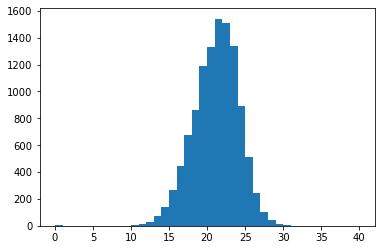

In [85]:
data_scores = expected_npi_score(df.to_numpy())
plt.hist(data_scores,bins = 40)
pass

## Avg test score of each cluster

In [ ]:
theta.insert(loc=0,
             column="Test Scores",
             value=theta.to_numpy())
display(theta)

# TSNE Plot with Classes

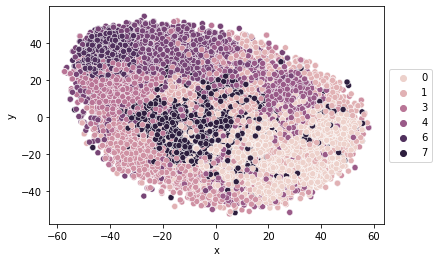

In [13]:
# Get projected data
df_proj["label"] = k.round().astype(np.int64).values
# Plot on ax
sns.scatterplot(x="x",
                y="y",
                data=df_proj,
                hue="label")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))